In [1]:
import pymc3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
model = pymc3.Model()
with model:
    mu1 = pymc3.Normal("mu1", mu=0, sd=1, shape=10)

In [3]:
with model:
    step = pymc3.NUTS()
    trace = pymc3.sample(1000, init=None, step=step, njobs=2)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
100%|██████████| 1000/1000 [00:01<00:00, 539.94it/s]


In [4]:
trace.varnames

['mu1']

In [5]:
trace.statnames

{'depth', 'step_size'}

In [6]:
trace.get_stats('depth')

array([4, 1, 4, ..., 5, 4, 3])

By the way, to me that looks like a lot of variation in step size even after 1000 steps. Is that intenstionals?

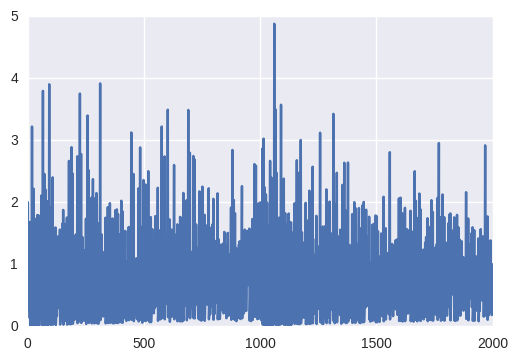

In [7]:
plt.plot(trace['step_size'])

# Multiple samplers, some export the same stats

Stack the stats along a new axis

In [8]:
model = pymc3.Model()
with model:
    mu1 = pymc3.Normal("mu1", mu=0, sd=1, shape=10)
    mu2 = pymc3.Normal("mu2", mu=0, sd=1, shape=10)
    mu3 = pymc3.Normal("mu3", mu=0, sd=1, shape=10)

In [9]:
with model:
    step1 = pymc3.Metropolis([mu1])
    step2 = pymc3.NUTS([mu2])
    step3 = pymc3.NUTS([mu3])
    trace = pymc3.sample(10, init=None, step=[step1, step2, step3], njobs=2)

100%|██████████| 10/10 [00:00<00:00, 111.31it/s]


In [10]:
trace.statnames

{'depth', 'laccept', 'step_size'}

In [16]:
trace['laccept']

array([-3.79981527, -3.58858633, -3.93184433, -6.21404214, -4.28373559,
       -4.18769263, -4.2828306 , -4.96251335, -2.31404663, -2.48961762,
       -9.50327699, -8.2878993 , -2.47751032, -6.47920242, -5.97269076,
       -3.21535127, -3.09581931, -4.46281923, -4.40202685, -4.66825235])

In [11]:
trace.get_stats('step_size')

array([[ 0.14058533,  0.14058533],
       [ 1.95547035,  1.94423405],
       [ 0.24832349,  0.24613036],
       [ 0.31152986,  0.29871468],
       [ 0.40788958,  0.51188278],
       [ 0.51644094,  0.95656527],
       [ 1.24937003,  2.31172947],
       [ 3.41631019,  0.04140893],
       [ 0.05178127,  0.10183418],
       [ 0.13780727,  0.27748105],
       [ 0.14058533,  0.14058533],
       [ 1.96226773,  1.95593836],
       [ 0.25911864,  0.24841476],
       [ 0.33595649,  0.26461786],
       [ 0.43241494,  0.45934491],
       [ 0.84003655,  0.82064539],
       [ 0.76946419,  0.18255824],
       [ 0.15784004,  0.4477381 ],
       [ 0.41249562,  0.77632174],
       [ 1.18015731,  2.09780836]])

In [17]:
chain = trace._straces[1]

In [18]:
chain.get_stats('depth')

array([[5, 4],
       [1, 1],
       [4, 3],
       [3, 4],
       [3, 3],
       [2, 2],
       [2, 5],
       [5, 3],
       [3, 3],
       [2, 1]])

In [20]:
chain.get_stats('depth', sampler_idx=1, burn=0, thin=1)

array([5, 1, 4, 3, 3, 2, 2, 5, 3, 2])

In [21]:
chain.get_stats('depth', sampler_idx=2)

array([4, 1, 3, 4, 3, 2, 5, 3, 3, 1])

In [22]:
chain._stats

[{'laccept': array([-9.50327699, -8.2878993 , -2.47751032, -6.47920242, -5.97269076,
         -3.21535127, -3.09581931, -4.46281923, -4.40202685, -4.66825235])},
 {'depth': array([5, 1, 4, 3, 3, 2, 2, 5, 3, 2]),
  'step_size': array([ 0.14058533,  1.96226773,  0.25911864,  0.33595649,  0.43241494,
          0.84003655,  0.76946419,  0.15784004,  0.41249562,  1.18015731])},
 {'depth': array([4, 1, 3, 4, 3, 2, 5, 3, 3, 1]),
  'step_size': array([ 0.14058533,  1.95593836,  0.24841476,  0.26461786,  0.45934491,
          0.82064539,  0.18255824,  0.4477381 ,  0.77632174,  2.09780836])}]

# Multiple samplers, only some export stats

In [25]:
model = pymc3.Model()
with model:
    mu1 = pymc3.Bernoulli("mu1", p=0.5)
    mu2 = pymc3.Normal("mu2", mu=0, sd=1, shape=10)
    trace = pymc3.sample(10)

Assigned BinaryGibbsMetropolis to mu1
Assigned NUTS to mu2
100%|██████████| 10/10 [00:00<00:00, 401.13it/s]


In [26]:
trace.statnames

{'depth', 'step_size'}